<a href="https://colab.research.google.com/github/Mgurudevi/experiment1/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

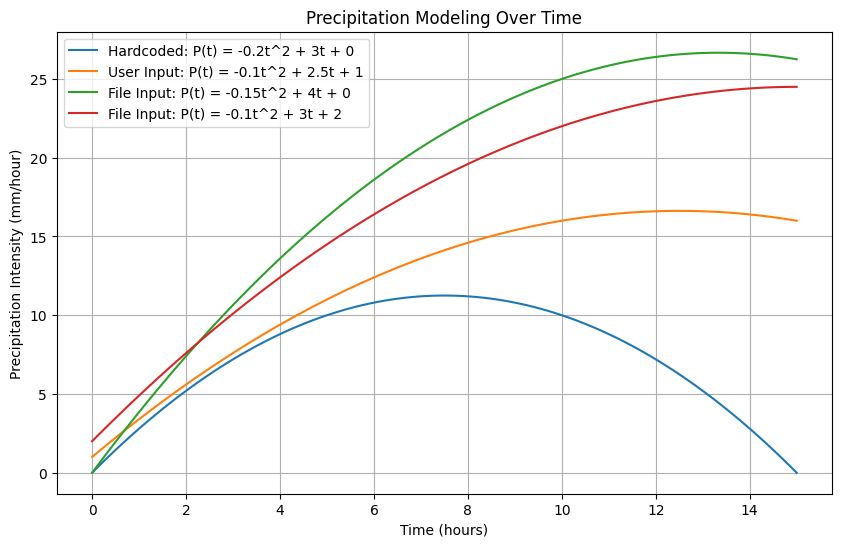

Results saved to: ./output_data/precipitation_results.json
Plot saved to: ./output_data/precipitation_model_plot.png


In [1]:
#BU22CSEN0100914
import numpy as np
import matplotlib.pyplot as plt
import os
import json

# Function to compute quadratic values for precipitation modeling
def precipitation_model(a, b, c, t_range):
    t = np.linspace(t_range[0], t_range[1], 100)
    P = a * t**2 + b * t + c
    return t, P

# Function to save data to a file
def save_to_file(data, filename):
    output_dir = './output_data/'
    os.makedirs(output_dir, exist_ok=True)
    file_path = os.path.join(output_dir, filename)
    with open(file_path, 'w') as f:
        json.dump(data, f)
    return file_path

# Function to plot and save graph
def plot_graph(data, labels, title, filename):
    plt.figure(figsize=(10, 6))
    for t, P, label in data:
        plt.plot(t, P, label=label)
    plt.title(title)
    plt.xlabel("Time (hours)")
    plt.ylabel("Precipitation Intensity (mm/hour)")
    plt.legend()
    plt.grid(True)
    output_dir = './output_data/'
    os.makedirs(output_dir, exist_ok=True)
    plot_path = os.path.join(output_dir, filename)
    plt.savefig(plot_path)
    plt.show()
    return plot_path

# Stage 1: Hardcoded example
hardcoded_coeffs = (-0.2, 3, 0)  # Example: P(t) = -0.2t^2 + 3t
t_range = (0, 15)  # Time range for precipitation event
t1, P1 = precipitation_model(*hardcoded_coeffs, t_range)

# Stage 2: User input (simulated)
user_coeffs = (-0.1, 2.5, 1)  # Example: P(t) = -0.1t^2 + 2.5t + 1
t2, P2 = precipitation_model(*user_coeffs, t_range)

# Stage 3: Read from file (simulated list of inputs)
file_inputs = [
    {"a": -0.15, "b": 4, "c": 0},  # Example 1: P(t) = -0.15t^2 + 4t
    {"a": -0.1, "b": 3, "c": 2},   # Example 2: P(t) = -0.1t^2 + 3t + 2
]

data_to_plot = [
    (t1, P1, f"Hardcoded: P(t) = {hardcoded_coeffs[0]}t^2 + {hardcoded_coeffs[1]}t + {hardcoded_coeffs[2]}"),
    (t2, P2, f"User Input: P(t) = {user_coeffs[0]}t^2 + {user_coeffs[1]}t + {user_coeffs[2]}"),
]

results = []
for coeffs in file_inputs:
    t, P = precipitation_model(coeffs["a"], coeffs["b"], coeffs["c"], t_range)
    results.append({"t": t.tolist(), "P": P.tolist()})
    data_to_plot.append((t, P, f"File Input: P(t) = {coeffs['a']}t^2 + {coeffs['b']}t + {coeffs['c']}"))

# Save results
results_file = save_to_file(results, "precipitation_results.json")

# Plot all results
plot_file = plot_graph(data_to_plot, None, "Precipitation Modeling Over Time", "precipitation_model_plot.png")

print(f"Results saved to: {results_file}")
print(f"Plot saved to: {plot_file}")
